# Coffee Roasting

In [1]:
import numpy as np
from numpy.typing import NDArray

from typing import Annotated
import matplotlib.pyplot as plt
import logging

import tensorflow as tf
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

print(f'Tensorflow version : {tf.__version__}')
print(f'Using GPU: {"no" if len(tf.config.list_physical_devices("GPU")) == 0 else "yes"}.')

# prevent tensorflow from using all the GPU memory
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    print(e)
logging.getLogger('tensorflow').setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

2025-11-19 15:26:42.354839: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-19 15:26:42.366148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763566002.380709   35655 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763566002.384806   35655 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-19 15:26:42.398462: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Tensorflow version : 2.18.0
Using GPU: no.


W0000 00:00:1763566004.251489   35655 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [2]:
from lab_coffee_utils import load_coffee_data, plt_roast

X, Y = load_coffee_data()
features = ['temperature', 'duration']
print(X[0])
X.shape, Y.shape

[185.32  12.69]


((200, 2), (200, 1))

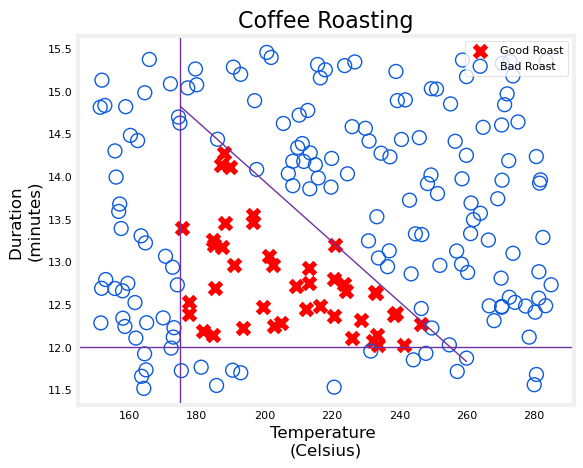

In [3]:
plt_roast(X, Y)

## Normalization

In [4]:
peak_to_peak = np.ptp(X, axis=0)

print(f'Peak to peak temperature: {peak_to_peak[0]:.2f}')
print(f'Peak to peak duration: {peak_to_peak[1]:.2f}')
print(f'Max temperature: {np.max(X[:, 0])}')
print(f'Max duration: {np.max(X[:, 1])}')

Peak to peak temperature: 133.67
Peak to peak duration: 3.94
Max temperature: 284.99434167453603
Max duration: 15.454206928801511


In [5]:
normalizer = Normalization(axis=-1)
normalizer.adapt(X)

Xn = normalizer(X);

In [6]:
peak_to_peak = np.ptp(Xn, axis=0)

print(f'Peak to peak temperature: {peak_to_peak[0]:.2f}')
print(f'Peak to peak duration: {peak_to_peak[1]:.2f}')
print(f'Max temperature: {np.max(Xn[:, 0])}')
print(f'Max duration: {np.max(Xn[:, 1])}')

Peak to peak temperature: 3.34
Peak to peak duration: 3.49
Max temperature: 1.6597541570663452
Max duration: 1.793238878250122


In [7]:
# Fake more examples

Xt = np.tile(Xn, (1000, 1))
Yt = np.tile(Y, (1000, 1))

Xt.shape, Yt.shape

((200000, 2), (200000, 1))

In [8]:
model = Sequential([
    Input(shape=(2,), name='input'),    # 2D
    Dense(3, activation='sigmoid', name='l1'),
    Dense(1, activation='sigmoid', name = 'l2')    # not best practice
])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ l1 (Dense)                      │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l2 (Dense)                      │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
l1 = model.get_layer('l1')
# w_l1 is (2, 3)
w_l1, b_l1 = l1.get_weights()

w_l1, b_l1

(array([[-0.48, -0.85, -0.39],
        [-0.4 ,  0.88, -0.46]], dtype=float32),
 array([0., 0., 0.], dtype=float32))

## Train the Model

In [11]:
tf.debugging.set_log_device_placement(True) # make sure data is in the GPU VRAM

model.compile(
    loss = BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

print('Starting model training...')
model.fit(
  Xt,
  Yt,
  epochs=10,
  verbose=1
)
print('Finished model training.')

# Disable device placement logging afterwards
tf.debugging.set_log_device_placement(False)

Starting model training...
Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 485us/step - loss: 0.2691
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 488us/step - loss: 0.1193
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 517us/step - loss: 0.0387
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 498us/step - loss: 0.0165
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 501us/step - loss: 0.0103
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 507us/step - loss: 0.0070
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 492us/step - loss: 0.0048
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 509us/step - loss: 0.0034
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 527us/step - loss: 0.0024
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 510us/step - loss: 0.0016
Finished model training.


In [12]:
W1, b1 = model.get_layer("l1").get_weights()
W2, b2 = model.get_layer("l2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[  0.18 -11.16  14.55]
 [ 10.34  -0.3   12.13]] 
b1: [ 12.48 -12.09   1.97]
W2:
 [[ 45.32]
 [-55.14]
 [-47.28]] 
b2: [-14.13]


In [13]:
X_test = np.array([
  [200, 13.9],  # positive
  [200, 19]   # negative
])

y_test = np.array([1, 0])

X_test_n = normalizer(X_test)

In [14]:
y_preds = model.predict(X_test_n)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [15]:
for p in y_preds:
  if p >= 0.5:
    print(1)
  else:
    print(0)

1
0


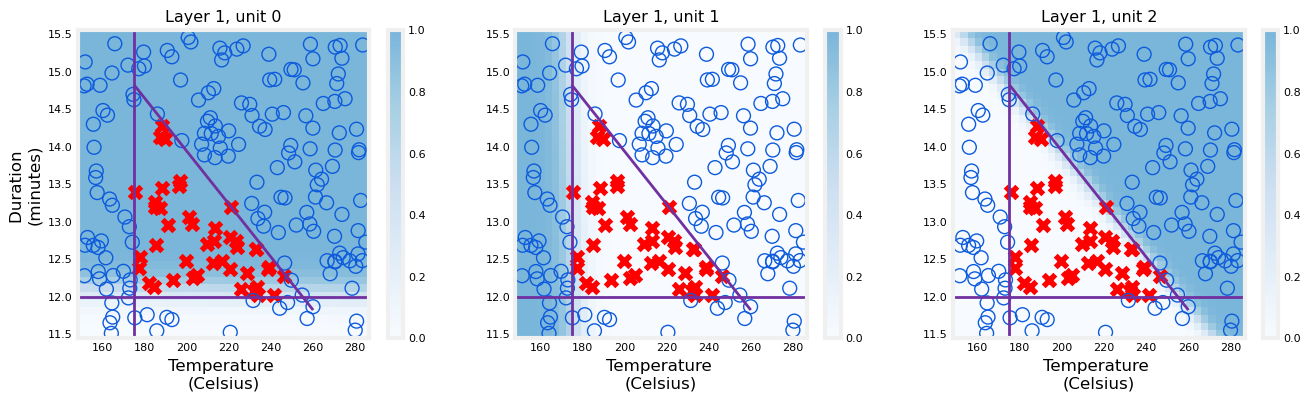

In [16]:
from lab_coffee_utils import plt_layer
plt_layer(X, Y.reshape(-1,), W1, b1, normalizer)

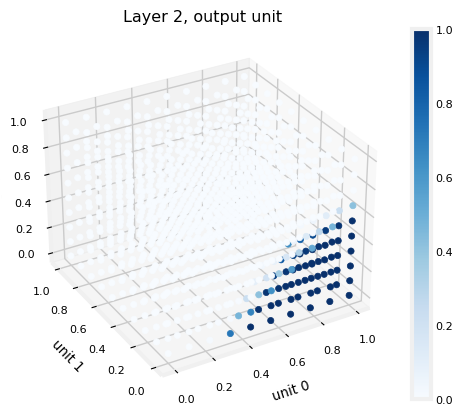

In [17]:
from lab_coffee_utils import plt_output_unit

plt_output_unit(W2, b2)

In [23]:
def manual_dense(a_in, W, b, g=lambda x: x): # g defaults to linear: it returns the raw logits
  """
  Dense layer implementation.
  Args:
    a_in: ndarray(n,)    incoming a
    W: ndarray(n, j)     weights matrix, features per unit in the layer, j units in the layer
    b: ndarray(n,)       bias vector
    g: f                 activation function
  Returns:
    a_out: ndarray(j,)   j units
  """

  print(f'manual_dense() called on a_in({a_in}) (shape={a_in.shape}) with W={W}')
  
  units = W.shape[1]
  a_out = np.zeros(units)

  for j in range(units):
    w = W[:, j] # (2, )
    print(f'manual_dense() calculated w={w} as W[:, j], where W shape is {W.shape}')
    print(f'manual_dense() is calculating `z = np.dot(w, a_in), where w shape is {w.shape}')
    z = np.dot(w, a_in) + b[j]
    print(f'manual_dense() calculated z as {z}')
    a_out[j] = g(z)
  
  print(f'manual_dense() is returning {a_out} (shape={a_out.shape})')
  return a_out


In [38]:
from mlutils import sigmoid

def sequential(X, W1, b1, W2, b2):
  print(f'sequential() called on {X} (shape={X.shape})')

  print(f'\nsequential() layer1')
  a1 = manual_dense(X, W1, b1, sigmoid)
  print(f'\nsequential() layer2')
  a2 = manual_dense(a1, W2, b2)         # manual_dense defaults to the linear function as g
  # The linear function will return a logit, and the function 'logit_to_int' will turn it into a '0 or 1' in a more stable way
  
  print(f'sequential() is returning {a2} (shape={a2.shape})')
  return a2

def logit_to_int(y: Annotated[NDArray[np.float64], ("n_targets", 1)]):
  return (y >= 0.5).astype(int)

def predict(X, W1, b1, W2, b2):
  m = X.shape[0]   # number of examples in the X matrix
  preds = np.zeros((m, 1))

  for i in range(m):
    print(f'\n\nPredicting target of row {i+1} of provided set X: {X[i]}')
    pred = sequential(X[i], W1, b1, W2, b2)[0] # returns [[ number ]], numpy will deprecate the implicit conversion to a scalar. Using [0] to extract the scalar
    preds[i, 0] = pred

  return logit_to_int(preds)

In [39]:
for i, p in enumerate(predict(X_test_n, W1, b1, W2, b2)):
  print(f'Element {i+1}: {p}')



Predicting target of row 1 of provided set X: [-0.47  0.42]
sequential() called on [-0.47  0.42] (shape=(2,))

sequential() layer1
manual_dense() called on a_in([-0.47  0.42]) (shape=(2,)) with W=[[  0.18 -11.16  14.55]
 [ 10.34  -0.3   12.13]]
manual_dense() calculated w=[ 0.18 10.34] as W[:, j], where W shape is (2, 3)
manual_dense() is calculating `z = np.dot(w, a_in), where w shape is (2,)
manual_dense() calculated z as 16.692928314208984
manual_dense() calculated w=[-11.16  -0.3 ] as W[:, j], where W shape is (2, 3)
manual_dense() is calculating `z = np.dot(w, a_in), where w shape is (2,)
manual_dense() calculated z as -7.003567218780518
manual_dense() calculated w=[14.55 12.13] as W[:, j], where W shape is (2, 3)
manual_dense() is calculating `z = np.dot(w, a_in), where w shape is (2,)
manual_dense() calculated z as 0.21338105201721191
manual_dense() is returning [1.00e+00 9.08e-04 5.53e-01] (shape=(3,))

sequential() layer2
manual_dense() called on a_in([1.00e+00 9.08e-04 5.53